<a href="https://colab.research.google.com/github/jpantojaj/Credit_Scoring_Specialization/blob/main/Sesi%C3%B3n_12_13_LGD_EAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Datos

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_data_defaults = pd.read_csv('loan_data_defaults.csv')

# Exploramos los datos

In [3]:
loan_data_defaults.columns.values

array(['Unnamed: 0', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E', 'grade:F', 'grade:G', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER',
       'home_ownership:OWN', 'home_ownership:RENT',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'purpose:car',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:f', 'initial_list_status:w', 'term_int',
       'emp_length_int', 'mths_since_issue_d',
       'mths_since_earliest_cr_line', 'funded_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',


In [4]:
loan_data_defaults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43236 entries, 0 to 43235
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           43236 non-null  int64  
 1   grade:A                              43236 non-null  int64  
 2   grade:B                              43236 non-null  int64  
 3   grade:C                              43236 non-null  int64  
 4   grade:D                              43236 non-null  int64  
 5   grade:E                              43236 non-null  int64  
 6   grade:F                              43236 non-null  int64  
 7   grade:G                              43236 non-null  int64  
 8   home_ownership:MORTGAGE              43236 non-null  int64  
 9   home_ownership:NONE                  43236 non-null  int64  
 10  home_ownership:OTHER                 43236 non-null  int64  
 11  home_ownership:OWN          

In [5]:
loan_data_defaults.head()

,Unnamed: 0,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:NONE,...,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim,recovery_rate,CCF
0,1,0,0,1,0,0,0,0,0,0,...,5,164,0,3,0,4,0,2500,0.046832,0.817416
1,8,0,0,0,0,0,1,0,0,0,...,2,164,0,11,0,13,0,5600,0.033761,0.971068
2,9,0,1,0,0,0,0,0,0,0,...,0,164,0,2,0,3,0,5375,0.050100,0.874701
3,12,0,0,1,0,0,0,0,0,0,...,1,164,0,4,0,9,0,9000,0.049367,0.860429
4,14,0,1,0,0,0,0,0,0,0,...,2,164,0,14,0,29,0,10000,0.064510,0.456653


In [6]:
loan_data_defaults.shape

(43236, 52)

### Eliminimos posibles duplicados

In [7]:
loan_data_defaults=loan_data_defaults.drop_duplicates()
loan_data_defaults.reset_index()
loan_data_defaults.shape

(43236, 52)

### Veamos el missing rate

In [8]:
null_values = pd.concat([loan_data_defaults.isnull().sum(), loan_data_defaults.isnull().sum() / len(loan_data_defaults)], axis = 1)
null_values.rename(columns = {0: 'number_null_values',1: 'ratio_null_values'}, inplace = True)
null_values

,number_null_values,ratio_null_values
Unnamed: 0,0,0.0
grade:A,0,0.0
grade:B,0,0.0
grade:C,0,0.0
grade:D,0,0.0
grade:E,0,0.0
grade:F,0,0.0
grade:G,0,0.0
home_ownership:MORTGAGE,0,0.0
home_ownership:NONE,0,0.0


In [9]:
loan_data_defaults.select_dtypes(include=['number']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,43236.0,199901.698284,134524.008623,1.000000,90943.500000,180863.500000,310780.250000,4.662810e+05
grade:A,43236.0,0.058632,0.234937,0.000000,0.000000,0.000000,0.000000,1.000000e+00
grade:B,43236.0,0.213757,0.409962,0.000000,0.000000,0.000000,0.000000,1.000000e+00
grade:C,43236.0,0.279142,0.448583,0.000000,0.000000,0.000000,1.000000,1.000000e+00
grade:D,43236.0,0.230017,0.420848,0.000000,0.000000,0.000000,0.000000,1.000000e+00
grade:E,43236.0,0.135720,0.342495,0.000000,0.000000,0.000000,0.000000,1.000000e+00
grade:F,43236.0,0.064252,0.245204,0.000000,0.000000,0.000000,0.000000,1.000000e+00
grade:G,43236.0,0.018480,0.134681,0.000000,0.000000,0.000000,0.000000,1.000000e+00
home_ownership:MORTGAGE,43236.0,0.442849,0.496729,0.000000,0.000000,0.000000,1.000000,1.000000e+00
home_ownership:NONE,43236.0,0.000185,0.013602,0.000000,0.000000,0.000000,0.000000,1.000000e+00


In [10]:
loan_data_defaults=loan_data_defaults.drop(columns = ['Unnamed: 0'])

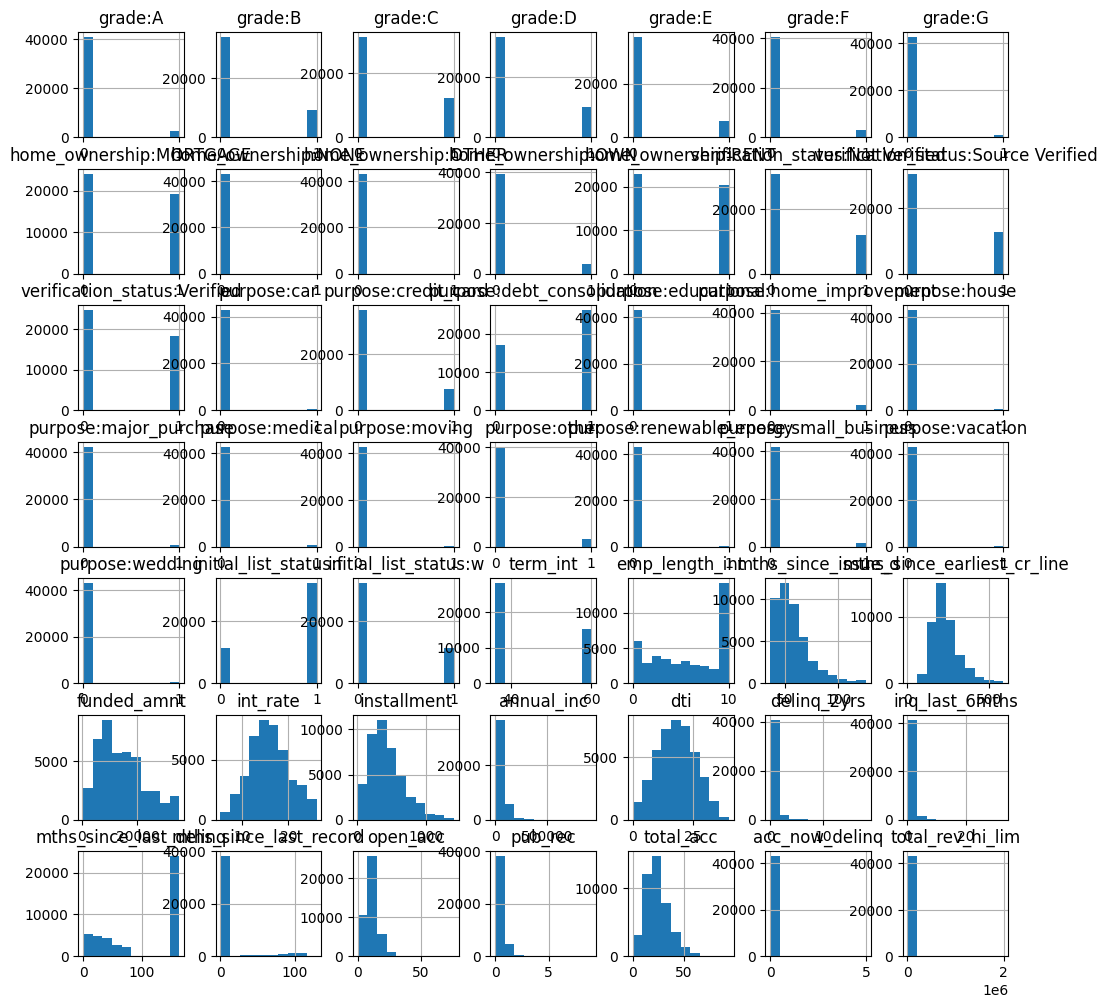

In [11]:
loan_data_defaults.drop(columns = ['recovery_rate','CCF']).hist(figsize = (12, 12))
plt.show()

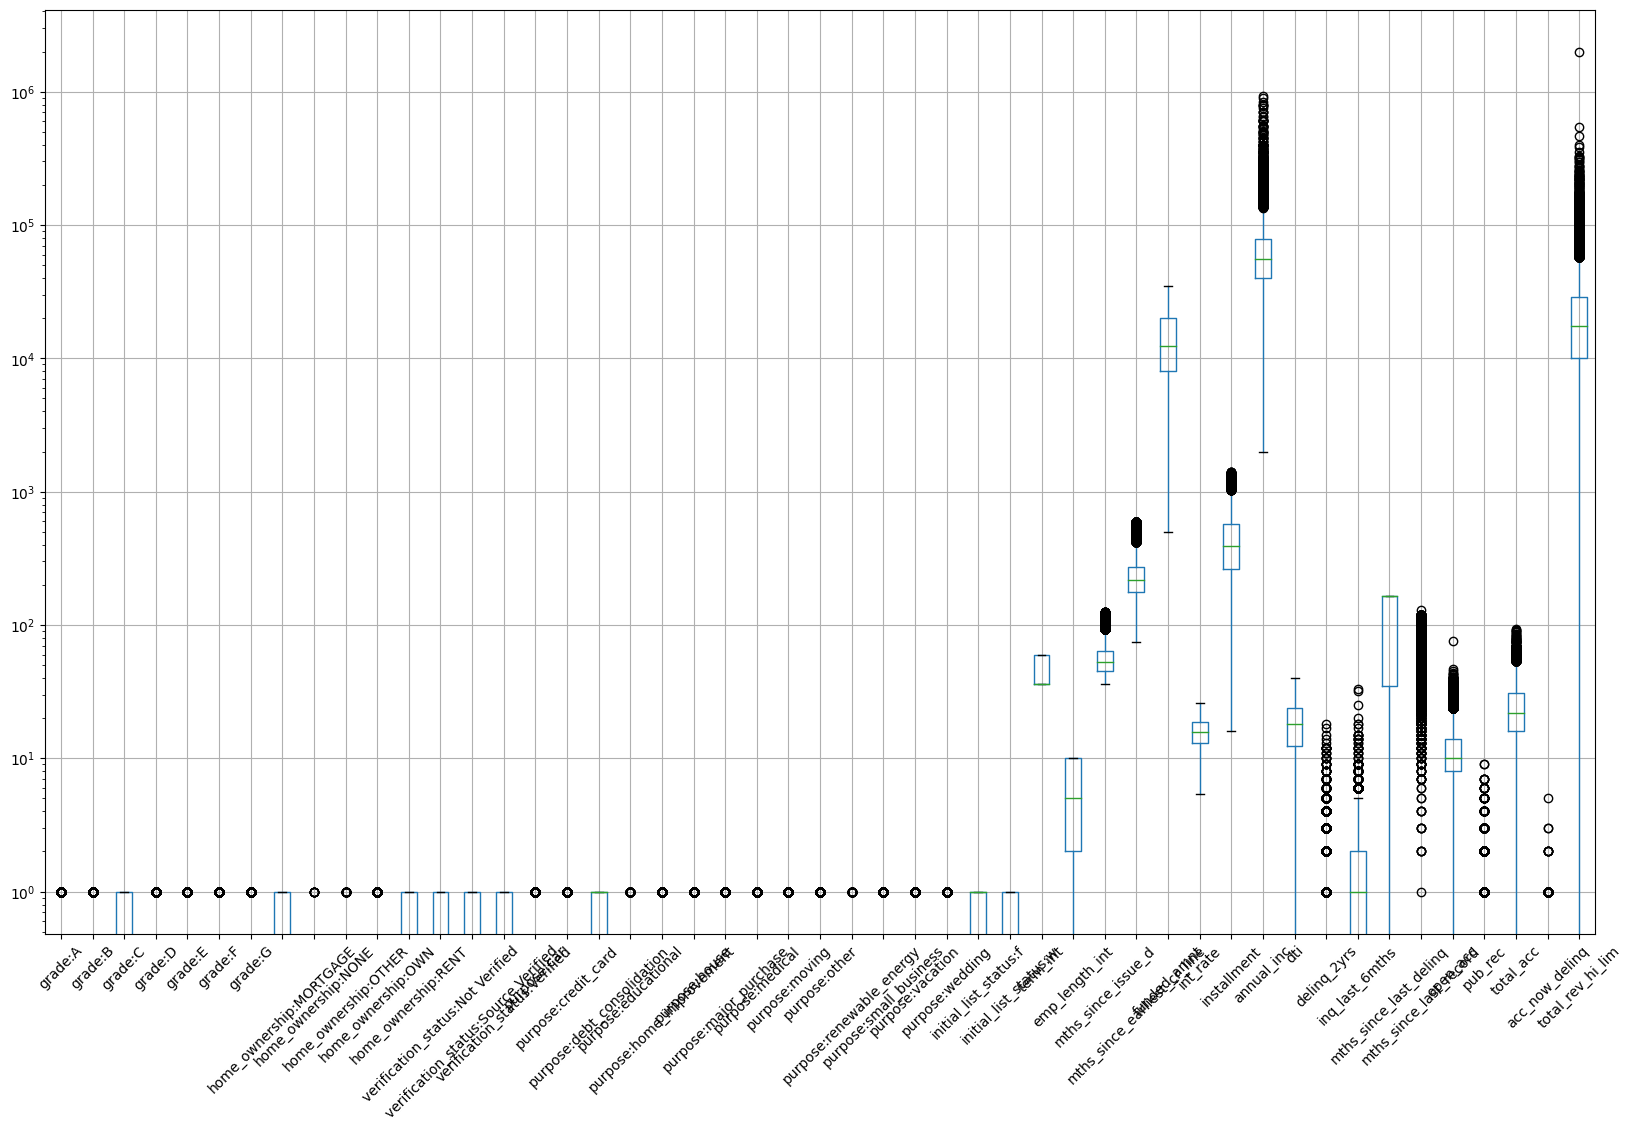

In [12]:
loan_data_defaults.drop(columns = ['recovery_rate','CCF']).boxplot(figsize = (20, 12))
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

### Generemos un reporte de outliers

In [13]:
def outliers_col(df):
  for columna in df:
    if df[columna].dtype != object:
      q1 = stats.scoreatpercentile(df[columna], 25)
      q3 = stats.scoreatpercentile(df[columna], 75)
      iqr = q3-q1
      lim_inf = q1-1.5*iqr
      lim_sup = q3+1.5*iqr
      n_outliers_inf = len(df[(df[columna]<lim_inf)])
      n_outliers_sup = len(df[(df[columna]>lim_sup)])
      print("{} | {} | {}".format(
          df[columna].name,
          n_outliers_inf,
          n_outliers_sup
          ))

In [14]:
outliers_col(loan_data_defaults)

grade:A | 0 | 2535
grade:B | 0 | 9242
grade:C | 0 | 0
grade:D | 0 | 9945
grade:E | 0 | 5868
grade:F | 0 | 2778
grade:G | 0 | 799
home_ownership:MORTGAGE | 0 | 0
home_ownership:NONE | 0 | 8
home_ownership:OTHER | 0 | 38
home_ownership:OWN | 0 | 3785
home_ownership:RENT | 0 | 0
verification_status:Not Verified | 0 | 0
verification_status:Source Verified | 0 | 0
verification_status:Verified | 0 | 0
purpose:car | 0 | 438
purpose:credit_card | 0 | 7449
purpose:debt_consolidation | 0 | 0
purpose:educational | 0 | 88
purpose:home_improvement | 0 | 2197
purpose:house | 0 | 278
purpose:major_purchase | 0 | 831
purpose:medical | 0 | 545
purpose:moving | 0 | 408
purpose:other | 0 | 2892
purpose:renewable_energy | 0 | 52
purpose:small_business | 0 | 1394
purpose:vacation | 0 | 259
purpose:wedding | 0 | 278
initial_list_status:f | 0 | 0
initial_list_status:w | 0 | 0
term_int | 0 | 0
emp_length_int | 0 | 0
mths_since_issue_d | 0 | 1631
mths_since_earliest_cr_line | 3 | 1518
funded_amnt | 0 | 0
int_r

# Recovery Rate

In [15]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [16]:
#Topea el recovery rate
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])

In [17]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

# Exploramos las variables

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

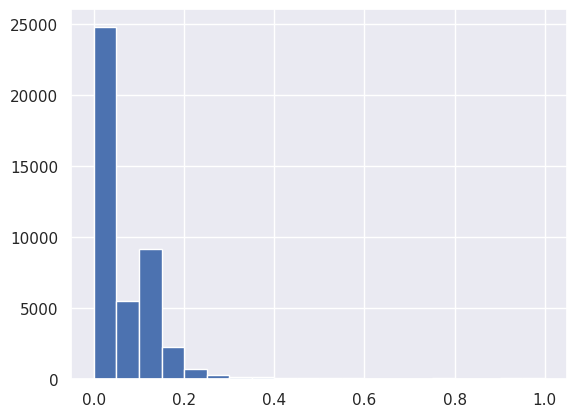

In [19]:
#Ploteamos el recovery rate
plt.hist(loan_data_defaults['recovery_rate'], bins = 20)
plt.show()

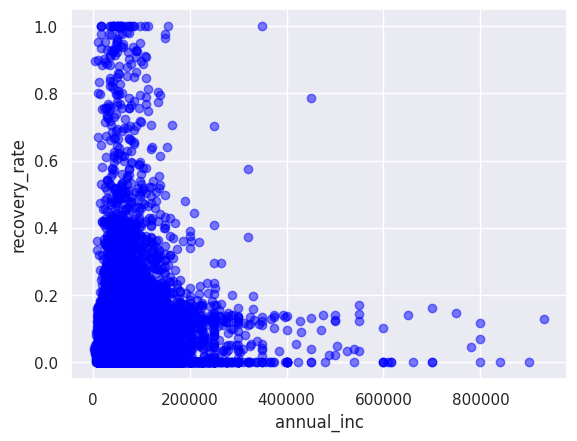

In [20]:
# Plotea variables
plt.scatter(loan_data_defaults['annual_inc'], loan_data_defaults['recovery_rate'],c='blue', alpha=0.5)
plt.xlabel('annual_inc')
plt.ylabel('recovery_rate')
plt.show()

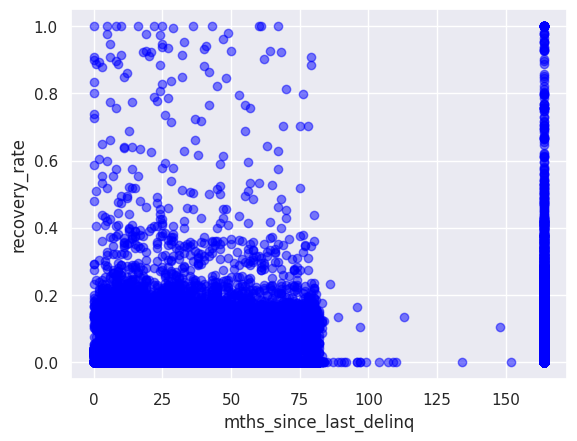

In [21]:
# Plotea variables
plt.scatter(loan_data_defaults['mths_since_last_delinq'], loan_data_defaults['recovery_rate'],c='blue', alpha=0.5)
plt.xlabel('mths_since_last_delinq')
plt.ylabel('recovery_rate')
plt.show()

In [22]:
#Dada la alta concentración de recovery rate en 0, vamos a crear una nueva variable
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)

In [23]:
loan_data_defaults['recovery_rate_0_1'].value_counts()

recovery_rate_0_1
1    24371
0    18865
Name: count, dtype: int64

## Generamos un Modelo de LGD: Dividimos la generación del modelo en 2 etapas

### Dividimos la data

In [ ]:
from sklearn.model_selection import train_test_split
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test =
train_test_split(loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1),
                 loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 123)

### Preparing the Inputs

In [ ]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [ ]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

### Estimamos el Modelo

In [ ]:
#Estimamos el modelo logístico
from sklearn.linear_model import LogisticRegression
reg_lgd_st_1 = LogisticRegression()
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

In [ ]:
feature_name = lgd_inputs_stage_1_train.columns.values
feature_name

In [ ]:
print(reg_lgd_st_1.intercept_)
print(reg_lgd_st_1.coef_)

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

### Revisamos el performance del modelo (TEST)

In [ ]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]
lgd_inputs_stage_1_test.head()

In [ ]:
lgd_inputs_stage_1_test.shape

In [ ]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.predict(lgd_inputs_stage_1_test)
y_hat_test_lgd_stage_1

In [ ]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.predict_proba(lgd_inputs_stage_1_test)
y_hat_test_proba_lgd_stage_1

In [ ]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]
y_hat_test_proba_lgd_stage_1

In [ ]:
lgd_targets_stage_1_test.shape

In [ ]:
preds_lr_df = pd.DataFrame(y_hat_test_proba_lgd_stage_1, columns = ['y_hat_test_proba_lgd_stage_1'])
preds_lr_df.head()

In [ ]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test.reset_index(drop = True).rename('lgd_targets_stage_1_test'), preds_lr_df], axis = 1)
df_actual_predicted_probs.head()

### Evaluamos la Precisión del Modelo

In [ ]:
tr = 0.5
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [ ]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])

In [ ]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

In [ ]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

In [ ]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
AUC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUC

In [ ]:
gini=2*AUC-1
gini

### Stage 2: Regresión Lineal sobre los valores >0

In [ ]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [ ]:
#Ploteamos el recovery rate
plt.hist(lgd_stage_2_data['recovery_rate'], bins = 50)
plt.show()

In [ ]:
# Plotea variables
plt.scatter(lgd_stage_2_data['annual_inc'], lgd_stage_2_data['recovery_rate'],c='blue', alpha=0.5)
plt.xlabel('annual_inc')
plt.ylabel('recovery_rate')
plt.show()

In [ ]:
# Dividimos los datos
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 123)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]

In [ ]:
reg_lgd_st_2 = LinearRegression()
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

In [ ]:
print(reg_lgd_st_2.intercept_)
print(reg_lgd_st_2.coef_)

In [ ]:
feature_name = lgd_inputs_stage_2_train.columns.values
feature_name

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
summary_table

### Stage 2 – Evaluación del Modelo

In [ ]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]
lgd_inputs_stage_2_test.head()

In [ ]:
lgd_inputs_stage_2_test.shape

In [ ]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)
y_hat_test_lgd_stage_2

In [ ]:
y_hat_test_lgd_stage_2.shape

In [ ]:
pred_linreg_stg2=pd.DataFrame(y_hat_test_lgd_stage_2,columns=['recovery_rate_pred'])

In [ ]:
pred_linreg_stg2.head()

In [ ]:
df_pred_stg2=pd.concat([lgd_targets_stage_2_test.reset_index(drop = True), pred_linreg_stg2], axis = 1)
df_pred_stg2.head()

In [ ]:
df_pred_stg2.corr()

In [ ]:
reg_lgd_st_2.score(lgd_inputs_stage_2_test,lgd_targets_stage_2_test)

In [ ]:
np.sqrt(mean_squared_error(lgd_targets_stage_2_test,y_hat_test_lgd_stage_2))

In [ ]:
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)

In [ ]:
pd.DataFrame(y_hat_test_lgd_stage_2).describe()

In [ ]:
y_hat_test_lgd_stage_2 = np.where(y_hat_test_lgd_stage_2 < 0, 0, y_hat_test_lgd_stage_2)
y_hat_test_lgd_stage_2 = np.where(y_hat_test_lgd_stage_2 > 1, 1, y_hat_test_lgd_stage_2)

In [ ]:
pd.DataFrame(y_hat_test_lgd_stage_2).describe()

### Combinamos el Stage 1 y 2: predecir si es =0 o mayor a 0, y para los mayores a 0 cuál es su recuperación

In [ ]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)
y_hat_test_lgd_stage_2_all

In [ ]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [ ]:
pd.DataFrame(y_hat_test_lgd).describe()

In [ ]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

In [ ]:
pd.DataFrame(y_hat_test_lgd).describe()

# Modelo para estimar EAD

In [ ]:
loan_data_defaults['CCF'].describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.hist(loan_data_defaults['CCF'], bins = 50)
plt.show()

In [ ]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop([ 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 123)

In [ ]:
ead_inputs_train = ead_inputs_train[features_all]
ead_inputs_train.head()

In [ ]:
reg_ead = LinearRegression()
reg_ead.fit(ead_inputs_train, ead_targets_train)

In [ ]:
print(reg_ead.intercept_)
print(reg_ead.coef_)

In [ ]:
feature_name = ead_inputs_train.columns.values

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
summary_table

### Evaluamos el modelo

In [ ]:
ead_inputs_test = ead_inputs_test[features_all]

In [ ]:
ead_inputs_test.head()

In [ ]:
ead_inputs_test.shape

In [ ]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)
y_hat_test_ead

In [ ]:
y_hat_test_ead.shape

In [ ]:
pred_ead=pd.DataFrame(y_hat_test_ead,columns=['y_hat_test_ead'])
pred_ead.head()

In [ ]:
df_ead=pd.concat([ead_targets_test.reset_index(drop = True), pred_ead], axis = 1)
df_ead.head()

In [ ]:
sns.distplot(ead_targets_test - y_hat_test_ead)

In [ ]:
reg_ead.score(ead_inputs_test,ead_targets_test)

In [ ]:
rmse_ead = np.sqrt(mean_squared_error(ead_targets_test,y_hat_test_ead))
rmse_ead

In [ ]:
pred_ead.describe()

In [ ]:
pred_ead['y_hat_test_ead'] = np.where(pred_ead['y_hat_test_ead'] < 0, 0, pred_ead['y_hat_test_ead'])
pred_ead['y_hat_test_ead'] = np.where(pred_ead['y_hat_test_ead'] > 1, 1, pred_ead['y_hat_test_ead'])

In [ ]:
pred_ead.describe()